# Some of Transaction by user name for the last 6 Hours

In [8]:
from modules.spamodule.spfinder import *

from modules.e_file import File

from pyspark.sql.types import *

import time

import datetime

import sys
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

user="Aagaard"

hour_interval="Now"

file_handler=File()



try:
    
    if hour_interval in ["Now","now"]:
        hour_interval=0
    #Get the last date and hour of the past hours requested
    date_cur=datetime.datetime.now() - datetime.timedelta(hours=hour_interval)
    
    #we  have to include the current hours also so add one to the requested hour
    hour_interval+=1
    
    i=0
    
    text=[]
    
    while i < hour_interval:

        file_name="/home/spark/tmp/spark/hsbc/examples/minning/"+str((date_cur+datetime.timedelta(hours=i)).strftime('%Y_%m_%d_%H'))
        
        if file_handler.is_file_exist(file_name+".json"):
            
            text.append(file_name+".json")

        i+=1

    list_file=",".join(text)
    
    #print(list_file)
    
    user_last_transaction=sc.textFile(list_file)
    
    data_frame =spark.read.json(user_last_transaction)

    data_frame.createOrReplaceTempView("credit_transaction")

    #swimmersJSON.show()
    number_of_transaction=(data_frame.count())

    #print(number_of_transaction)

    #list of the transaction
    data_frame_sql=spark.sql("select * from credit_transaction where SenderName='"+user+"'")

    #sum of the transaction
    data_frame_sql.groupBy().sum("Amount").show(data_frame_sql.count(),False)

except Exception as ex:
    print(ex)
    print("No record found for user:'"+user+"'")
    


+-----------+
|sum(Amount)|
+-----------+
|64249153   |
+-----------+



# List of Transaction by user name for th last 6 hours

In [9]:
from modules.spamodule.spfinder import *

from modules.e_file import File

from pyspark.sql.types import *

import time

import datetime

import sys
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

user="Aagaard"

hour_interval="Now"

file_handler=File()



try:
    
    if hour_interval in ["Now","now"]:
        hour_interval=0
    #Get the last date and hour of the past hours requested
    date_cur=datetime.datetime.now() - datetime.timedelta(hours=hour_interval)
    
    #we  have to include the current hours also so add one to the requested hour
    hour_interval+=1
    
    i=0
    
    text=[]
    
    while i < hour_interval:

        file_name="/home/spark/tmp/spark/hsbc/examples/minning/"+str((date_cur+datetime.timedelta(hours=i)).strftime('%Y_%m_%d_%H'))
        
        if file_handler.is_file_exist(file_name+".json"):
            
            text.append(file_name+".json")

        i+=1

    list_file=",".join(text)
    
    #print(list_file)
    
    user_last_transaction=sc.textFile(list_file)
    
    data_frame =spark.read.json(user_last_transaction)

    data_frame.createOrReplaceTempView("credit_transaction")

    #swimmersJSON.show()
    number_of_transaction=(data_frame.count())

    #print(number_of_transaction)

    #list of the transaction
    data_frame_sql=spark.sql("select * from credit_transaction where SenderName='"+user+"'")
    
    data_frame_sql.show(number_of_transaction,False)
    

except Exception as ex:
    print(ex)
    print("No record found for user:'"+user+"'")
    


+------+-------------------+---------------------------------+-------------------------+-----------------+----------+-----------------+-------------------+------+-------------------------+
|Amount|DateTimeTransaction|RecipientCardPrimaryAccountNumber|SenderAccountNumber      |SenderCountryCode|SenderName|SourceOfFundsNote|TransactionCurrency|action|token                    |
+------+-------------------+---------------------------------+-------------------------+-----------------+----------+-----------------+-------------------+------+-------------------------+
|244478|2018-08-18 18:00:03|6811756091979024737898090        |6811756091979024737898090|USA              |Aagaard   |null             |USD                |trans |2372509260099424850835784|
|249910|2018-08-18 18:00:05|1520242981445563944388153        |1520242981445563944388153|USA              |Aagaard   |null             |USD                |trans |2490791914001685866672976|
|699884|2018-08-18 18:00:11|1025733358687623294098463  

# Save data into database by user name for the past 6 hours transaction

In [ ]:
from modules.spamodule.spfinder import *

from modules.e_file import File

from pyspark.sql.types import *

import time

import datetime

import sys
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

user="Aagaard"

hour_interval="Now"

file_handler=File()


try:
    
    if hour_interval in ["Now","now"]:
        hour_interval=0
    #Get the last date and hour of the past hours requested
    date_cur=datetime.datetime.now() - datetime.timedelta(hours=hour_interval)
    
    #we  have to include the current hours also so add one to the requested hour
    hour_interval+=1
    
    i=0
    
    text=[]
    
    while i < hour_interval:

        file_name="/home/spark/tmp/spark/hsbc/examples/minning/"+str((date_cur+datetime.timedelta(hours=i)).strftime('%Y_%m_%d_%H'))
        
        if file_handler.is_file_exist(file_name+".json"):
            
            text.append(file_name+".json")

        i+=1

    list_file=",".join(text)
    
    #print(list_file)
    
    user_last_transaction=sc.textFile(list_file)
    
    data_frame =spark.read.json(user_last_transaction)

    data_frame.createOrReplaceTempView("credit_transaction")

    #swimmersJSON.show()
    number_of_transaction=(data_frame.count())

    #print(number_of_transaction)

    #list of the transaction
    data_frame_sql=spark.sql("select * from credit_transaction where SenderName='"+user+"'")
    
    data_frame_sql.write.format('jdbc').options(
      url='jdbc:mysql://localhost/spark',
      driver='com.mysql.jdbc.Driver',
      dbtable='credit_transaction',
      user='spark',
      password='spark').mode('append').saveAsTable("credit_transaction")

except Exception as ex:
    print(ex)
    print("No record found for user:'"+user+"'")

# Simple Dashboard for the transaction Amount by the given user name

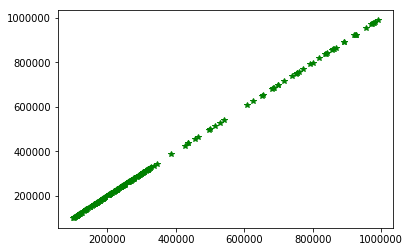

In [10]:
from modules.spamodule.spfinder import *

from modules.e_file import File

from pyspark.sql.types import *

import time

import datetime

import sys
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

user="Aagaard"

hour_interval="Now"

file_handler=File()



try:
    
    if hour_interval in ["Now","now"]:
        hour_interval=0
    #Get the last date and hour of the past hours requested
    date_cur=datetime.datetime.now() - datetime.timedelta(hours=hour_interval)
    
    #we  have to include the current hours also so add one to the requested hour
    hour_interval+=1
    
    i=0
    
    text=[]
    
    while i < hour_interval:

        file_name="/home/spark/tmp/spark/hsbc/examples/minning/"+str((date_cur+datetime.timedelta(hours=i)).strftime('%Y_%m_%d_%H'))
        
        if file_handler.is_file_exist(file_name+".json"):
            
            text.append(file_name+".json")

        i+=1

    list_file=",".join(text)
    
    #print(list_file)
    
    user_last_transaction=sc.textFile(list_file)
    
    data_frame =spark.read.json(user_last_transaction)

    data_frame.createOrReplaceTempView("credit_transaction")

    #swimmersJSON.show()
    number_of_transaction=(data_frame.count())

    #print(number_of_transaction)

    #list of the transaction
    data_frame_sql=spark.sql("select * from credit_transaction where SenderName='"+user+"'")
    
    x=spark.sql("select Amount from credit_transaction where SenderName='"+user+"'")


    t =[int(i.Amount) for i in spark.sql("select Amount from credit_transaction where SenderName='"+user+"'").collect()]


    plt.plot(t, t, 'g*')

except Exception as ex:
    print(ex)
    print("No record found for user:'"+user+"'")
    
